<a href="https://colab.research.google.com/github/ylorenzi/Bootcamp-Alura-Data-Science/blob/main/Desafios_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
#Formato dos números nos gráficos
pd.options.display.float_format = "{:2f}".format


# Aula 1
# Importar base de dados do tabnet.
#Para conseguir ler o arquivo no formato brasileiro
encoding="ISO8859-1",skiprows=3,sep=";",skipfooter=12,
#Para mudar o formato dos números
thousands=".",decimal=","

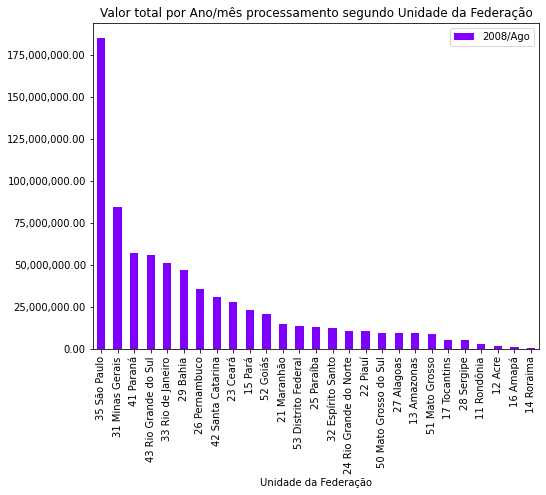

In [2]:
dados = pd.read_csv("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A151346189_28_143_208.csv",encoding="ISO8859-1",skiprows=3,sep=";",skipfooter=12,thousands=".",decimal=",",engine="python")
ax = dados.sort_values("2008/Ago",ascending=False).plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(8,6),colormap="rainbow")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada
plt.title("Valor total por Ano/mês processamento segundo Unidade da Federação")
plt.show()

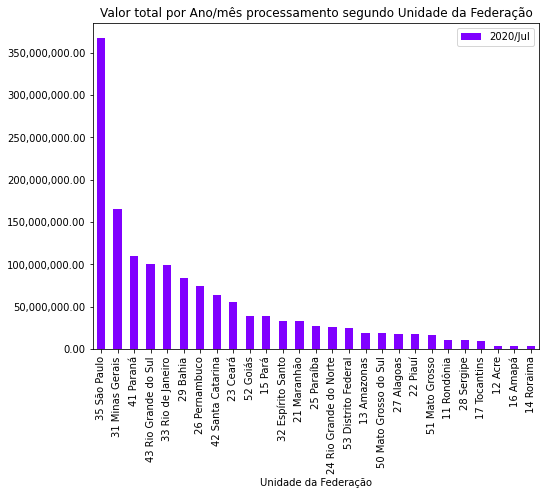

In [3]:
#Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência
#OBS: 2020/Ago possui valores Nan por isso usamos 2020/Jul
ax = dados.sort_values("2020/Jul",ascending=False).plot(x="Unidade da Federação",y="2020/Jul",kind="bar",figsize=(8,6),colormap="rainbow")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor total por Ano/mês processamento segundo Unidade da Federação")
plt.show()

# Aula 2

In [4]:
dados = pd.read_csv("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO8859-1",skiprows=3,skipfooter=12,sep=";",thousands=".",decimal=",",
                    engine="python")
dados.head(2)
#Muitos valores missing!

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.800000,8199032.670000,8363386.070000,7889819.500000,8603943.850000,8048398.250000,8159737.490000,8457455.710000,7766983.200000,8858845.570000,8407076.440000,9492938.920000,8206195.920000,9011612.580000,9124967.840000,8406732.720000,8411360.020000,8651081.660000,8193425.990000,8388269.450000,8645315.780000,9050329.130000,9211262.510000,9490545.020000,8600886.200000,8919190.860000,8909111.890000,8409386.090000,8924348.410000,8948605.660000,8660753.050000,8326416.320000,8413784.420000,7174312.310000,7423678.640000,8581195.130000,9193593.760000,7407388.240000,3556381.57,929129659.720000
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.350000,3562691.540000,3375296.640000,3341497.580000,3358378.050000,3145385.440000,2638773.920000,2968168.750000,2769797.390000,3057631.960000,2874965.310000,3175575.170000,3060903.210000,3253011.610000,3040645.050000,2926179.270000,3126120.640000,2473454.850000,2277493.490000,2594347.320000,2234388.360000,2473008.490000,2979764.770000,3070533.950000,3249052.690000,3567538.640000,2981072.980000,2998860.310000,3293378.970000,3174249.430000,2959569.090000,3261123.880000,2981264.220000,2859102.060000,2472063.080000,2383895.480000,2199920.700000,1163813.080000,-,420668039.630000


# Selecionando as colunas completas

In [5]:
# Selecionando as colunas completas e transformando em lista para podermos adicionar a coluna Unidadade da Federação que foi cortada
colunas_usaveis=dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis =dados[colunas_usaveis]
usaveis.head(2)

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.370000,16397.030000,133645.190000,346912.840000,711758.310000,1829559.710000,1940792.630000,1955721.680000,2143353.810000,2280382.580000,2624542.970000,2973421.020000,2938286.290000,2843930.910000,2878153.200000,2780022.620000,2651804.890000,3147566.240000,3082108.120000,4190355.330000,4040251.620000,3946423.710000,3372377.960000,3720608.860000,3787323.260000,3679369.940000,3866146.990000,3667808.600000,3633471.790000,3812315.590000,3911776.030000,4663060.750000,4524544.880000,4778755.260000,4369733.230000,4632439.120000,4464307.470000,4668642.020000,4490368.230000,...,8140639.490000,8041248.800000,8199032.670000,8363386.070000,7889819.500000,8603943.850000,8048398.250000,8159737.490000,8457455.710000,7766983.200000,8858845.570000,8407076.440000,9492938.920000,8206195.920000,9011612.580000,9124967.840000,8406732.720000,8411360.020000,8651081.660000,8193425.990000,8388269.450000,8645315.780000,9050329.130000,9211262.510000,9490545.020000,8600886.200000,8919190.860000,8909111.890000,8409386.090000,8924348.410000,8948605.660000,8660753.050000,8326416.320000,8413784.420000,7174312.310000,7423678.640000,8581195.130000,9193593.760000,7407388.240000,929129659.720000
1,12 Acre,10470.070000,14001.710000,86200.850000,301323.680000,769612.360000,1731744.620000,1743978.660000,2057439.020000,2057829.690000,2226577.930000,2112576.820000,2029128.010000,1886871.840000,2084884.800000,2230838.450000,2122013.120000,2196651.690000,2152239.300000,2086775.610000,2476364.260000,2396887.630000,2610261.800000,2174098.100000,2051885.160000,1714707.910000,1341532.340000,2288458.900000,2462712.790000,2254900.200000,2381535.930000,2079981.050000,2564837.770000,2588318.060000,2538525.670000,2319786.410000,2279156.600000,2454599.370000,2578923.750000,2625443.290000,...,3161446.530000,3355223.350000,3562691.540000,3375296.640000,3341497.580000,3358378.050000,3145385.440000,2638773.920000,2968168.750000,2769797.390000,3057631.960000,2874965.310000,3175575.170000,3060903.210000,3253011.610000,3040645.050000,2926179.270000,3126120.640000,2473454.850000,2277493.490000,2594347.320000,2234388.360000,2473008.490000,2979764.770000,3070533.950000,3249052.690000,3567538.640000,2981072.980000,2998860.310000,3293378.970000,3174249.430000,2959569.090000,3261123.880000,2981264.220000,2859102.060000,2472063.080000,2383895.480000,2199920.700000,1163813.080000,420668039.630000


In [6]:
#Transformar Unidade da Federação em um índice

usaveis = usaveis.set_index("Unidade da Federação")

In [7]:
#Dropar a Coluna Total para plotar gráficos
usaveis = usaveis.drop("Total",axis=1)


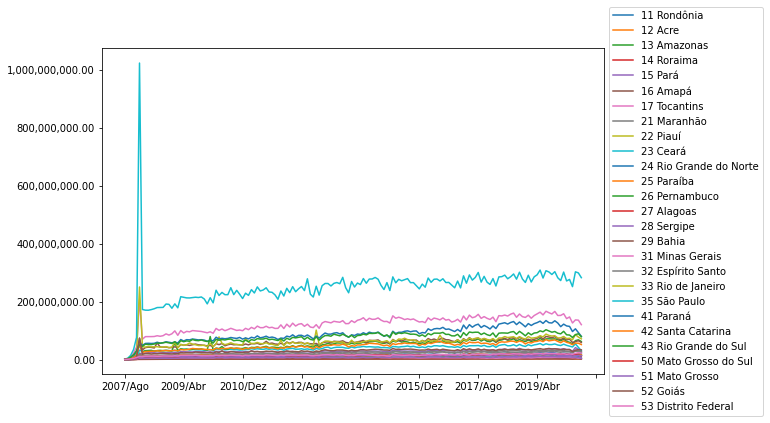

In [8]:
# Para plotar os gráficos é necessário transpor o dataframe
ax = usaveis.T.plot(figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

In [9]:
estados_escolhidos = usaveis.loc["31 Minas Gerais":"41 Paraná"].index
estados_escolhidos

Index(['31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro',
       '35 São Paulo', '41 Paraná'],
      dtype='object', name='Unidade da Federação')

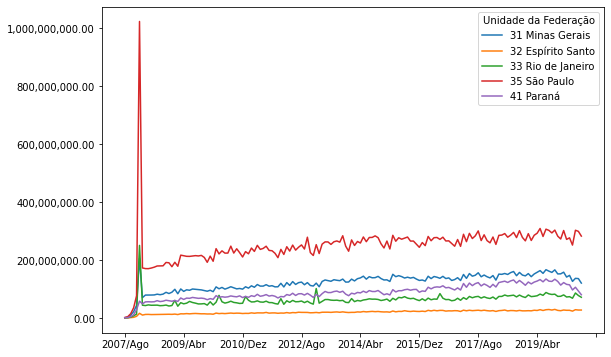

In [10]:
ax = usaveis.T[estados_escolhidos].plot(figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))


# Aula 3
#Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.
#colormap="Spectral"

# Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [11]:
# Função que determina Região baseado no primeiro caracter
def regiao(x):
  if x[0]=="1":
    return "Norte"
  if x[0]=="2":
    return "Nordeste"
  if x[0]=="3":
    return "Sudeste"
  if x[0]=="4":
    return "Sul"
  if x[0]=="5":
    return "Centro Oeste"

In [12]:
# List comprehension que extrai os dois primeiros caracteres do índice
[x[:2] for x in usaveis.index]

['11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '31',
 '32',
 '33',
 '35',
 '41',
 '42',
 '43',
 '50',
 '51',
 '52',
 '53']

In [13]:
# Criando a nova coluna Região
# Map retorna os valores de uma função usando uma lista como argumento
usaveis["Região"] = list(map(regiao,[x[:2] for x in usaveis.index]))
usaveis["Região"]

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro Oeste
51 Mato Grosso            Centro Oeste
52 G

# Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

In [14]:
# Parece existir um erro na base de dados para os primeiros meses, portanto deixaremos de fora da análise as primeiras colunas 
#.iloc[6:,:]
# É preciso dropar a coluna região recém criada para plotar os gráficos.
nordeste = usaveis[usaveis["Região"]=="Nordeste"] #Salvando os estados no Nordeste
sudeste = usaveis[usaveis["Região"]=="Sudeste"] #Salvando os estados no Sudeste
usaveis = usaveis.drop("Região",axis=1)

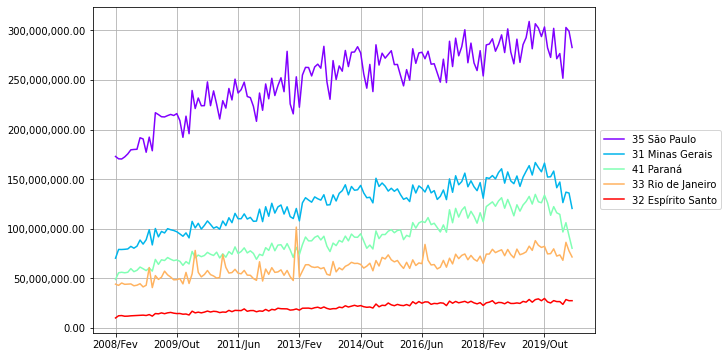

In [15]:
ax = usaveis.T[estados_escolhidos].sort_values("2007/Ago",axis=1,ascending=False).iloc[6:,:].plot(figsize=(9,6),colormap="rainbow",grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

In [16]:
adicionado = pd.concat([usaveis.T[estados_escolhidos],usaveis.T["42 Santa Catarina"]],axis=1)
adicionado.head(3)

,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina
2007/Ago,971394.370000,57408.110000,469469.340000,1665349.900000,554800.220000,693955.050000
2007/Set,2861781.500000,284224.800000,921646.570000,4434168.640000,1431708.010000,1092964.120000
2007/Out,10018011.350000,1152115.250000,2994664.570000,14577395.840000,4630402.440000,3562300.820000


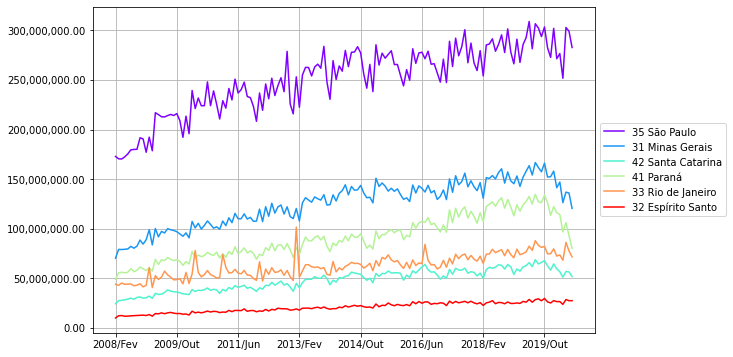

In [17]:
ax = adicionado.sort_values("2007/Ago",axis=1,ascending=False).iloc[6:,:].plot(figsize=(9,6),colormap="rainbow",grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue
A dengue tem seus picos entre janeiro e maio. O ano de 2013 teve um surto da doença.
Fonte: http://g1.globo.com/bemestar/noticia/2014/05/copa-vai-coincidir-com-periodo-em-que-dengue-costuma-diminuir.html

Os condicionantes da expansão da dengue no Brasil, assim como nas
Américas, referem-se, em grande parte, ao modelo de crescimento econômico
implementado na região, caracterizado pelo crescimento desordenado dos
centros urbanos com importantes lacunas no setor de infraestrutura, tais como
dificuldades para garantir o abastecimento regular e contínuo de água, a coleta
e o destino adequado dos resíduos sólidos. Ressalta-se que mais de 80% da
população do País está concentrada na área urbana.

Fonte: Plano de Contingência Nacional para Epidemias de Dengue (2015)




# Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

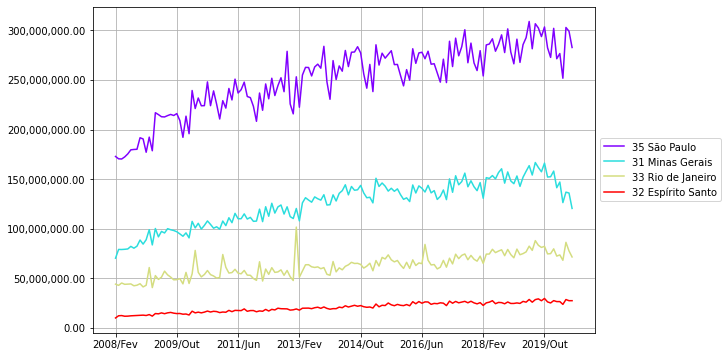

In [20]:
sudeste = sudeste.drop("Região",axis=1)
ax = sudeste.T.sort_values("2007/Ago",axis=1,ascending=False).iloc[6:,:].plot(figsize=(9,6),colormap="rainbow",grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

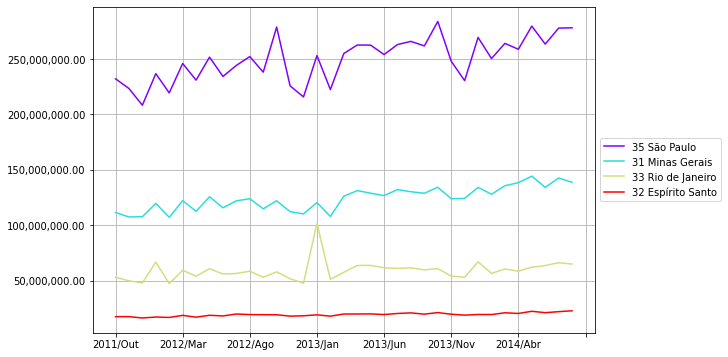

In [28]:
#Reduzindo o intervalo de tempo para o efeito ficar mais visível
ax = sudeste.T.sort_values("2007/Ago",axis=1,ascending=False).iloc[50:85,:].plot(figsize=(9,6),colormap="rainbow",grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Fica mais claro que Minas, Rio e São Paulo tiveram picos não usuais simultâneamente em 2013>

# Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [32]:
adicionado = pd.concat([sudeste.T,usaveis.T["42 Santa Catarina"]],axis=1)
adicionado.head()

,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,42 Santa Catarina
2007/Ago,971394.370000,57408.110000,469469.340000,1665349.900000,693955.050000
2007/Set,2861781.500000,284224.800000,921646.570000,4434168.640000,1092964.120000
2007/Out,10018011.350000,1152115.250000,2994664.570000,14577395.840000,3562300.820000
2007/Nov,21730281.630000,2296383.230000,7250528.080000,35032259.980000,7578502.380000
2007/Dez,43429517.540000,5724199.540000,13627123.270000,76668547.410000,14772555.100000


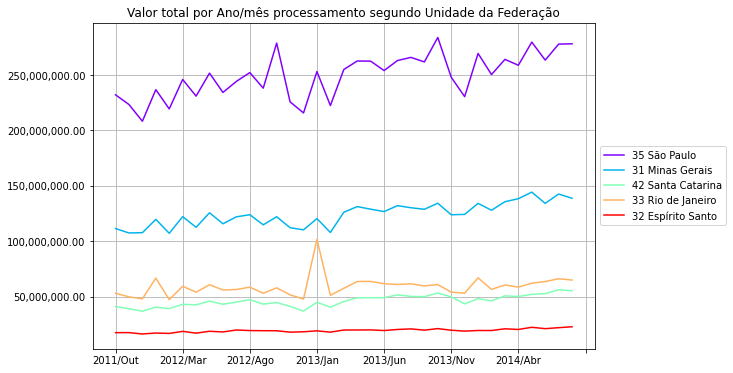

In [35]:
ax = adicionado.sort_values("2007/Ago",axis=1,ascending=False).iloc[50:85,:].plot(figsize=(9,6),colormap="rainbow",grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Valor total por Ano/mês processamento segundo Unidade da Federação")
plt.show()